In [2]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the path to the folder containing the images
folder_path = 'carcinoma_in_situ'

# Initialize an empty list to store the feature vectors
feature_vectors = []

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)

    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Reshape the grayscale image into a 1D vector
    features = gray_image.reshape(-1)

    # Append the feature vector to the list
    feature_vectors.append(features)

# Find the maximum length of the feature vectors
max_length = max(len(features) for features in feature_vectors)

# Pad feature vectors with zeros to make them all the same length
padded_feature_vectors = []
for features in feature_vectors:
    padding = max_length - len(features)
    padded_features = np.pad(features, (0, padding), mode='constant')
    padded_feature_vectors.append(padded_features)

# Convert the padded_feature_vectors list to a numpy array
X = np.array(padded_feature_vectors)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # You can specify the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# The resulting X_pca will contain the transformed features after PCA

In [9]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the image using OpenCV
image_path = 'carcinoma_in_situ/149315671-149315740-001_filtered_0.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Reshape the grayscale image into a 1D vector
features = gray_image.flatten().astype(float)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features.reshape(1, -1))

# Apply PCA
pca = PCA(n_components=1)  # Set n_components to 1
X_pca = pca.fit_transform(X_scaled)

# The resulting X_pca will contain the transformed features after PCA

C:\Users\priya\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.pyplot import imread

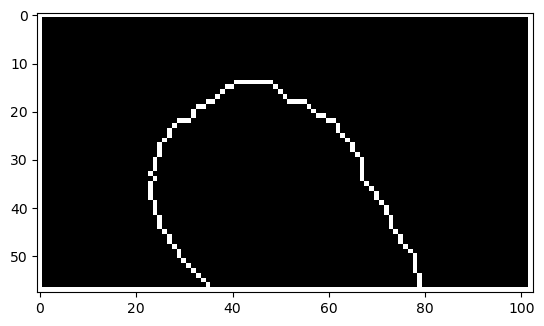

In [4]:
img = imread("carcinoma_in_situ/149315671-149315740-001_filtered_0.png")
img = img.astype(np.uint8)
img = img/255
img = img.mean(axis = 2)
plt.imshow(img, cmap = "gray")

In [39]:
def transform(percentage):
    percentage = percentage/100
    tswizzle_pca = PCA(n_components = percentage).fit(img)
    transformed = tswizzle_pca.transform(img)
    projection = tswizzle_pca.inverse_transform(transformed)
    plt.imshow(projection, cmap="gray")

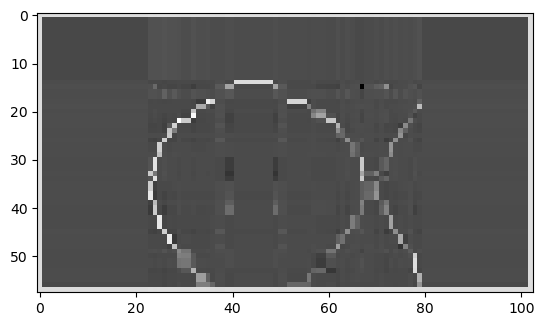

In [42]:
transform(89)